Esse dataset foi obtido através do link: https://www.kaggle.com/blastchar/telco-customer-churn

##  1. Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Lendo dados

In [2]:
df = pd.read_csv(r'churn telcon.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Informações iniciais sobre nossos dados

In [3]:
## verificando quantas linhas e colunas temos no data set
df.shape

(7043, 21)

In [4]:
# verificando dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Não temos dados nulos no dataset....


## Vamos explorar nossos dados :) 

- Perguntas que são legais de serem respondidas:
    - Qual o percentual de homens e mulheres no data set ?
    - Qual  o percentual de SeniorCitizens (pessoas mais velhas) ?
    - Qual a média de tenure? e sua distribuição? (tempo em meses que o cliente permaneceu comprando na empresa)
    - Qual a média de total charges (compra de créditos) por tipo de pagamento (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) ?
    - Qual a proporção de churns ?
    - Os os tipos de pagamentos com mais churn?
    - Existe algum padrão se a compra mensal = Total de créditos ? (Ou seja, o cliente comprou apenas créditos por 1 mês)
 

In [5]:
## Antes de iniciar a exploração vamos excluir a primeira coluna do dataset

df = df.iloc[:,1:]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


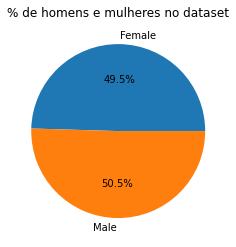

In [6]:
# 1. Qual o percentual de homens e mulheres no data set ?

# trazendo somente 1 coluna
df.groupby('gender').size().plot.pie(autopct="%.1f%%");
plt.ylabel('')
plt.title('% de homens e mulheres no dataset', fontsize = 12);


In [7]:
## Qual o percentual de SeniorCitizens (pessoas mais velhas) ?

df['SeniorCitizen'].value_counts(normalize = True)

# temos uma proporção um pouco discrepante, logo 83,7% do nosso dataset nao sao senior citizens, enqnt 16,3% são pessoas mais seniores

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

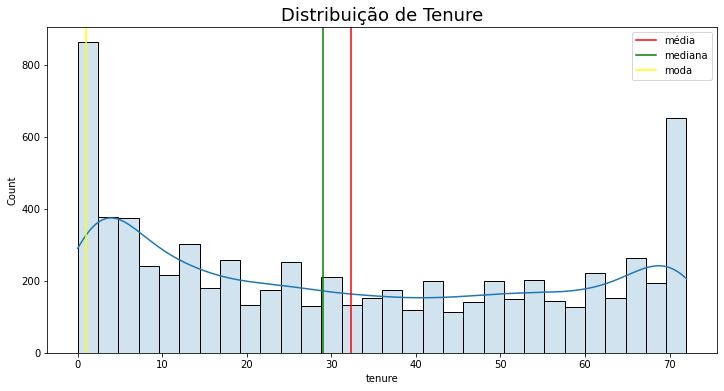

In [8]:
## Qual a média de tenure? e sua distribuição? (tempo em meses que o cliente permaneceu comprando na empresa
plt.figure(figsize=(12, 6))

plt.title("Distribuição de Tenure", size=18)

sns.histplot(df["tenure"], kde=True, alpha=0.2, bins = 30)

# plotando média
plt.axvline(x=df["tenure"].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df["tenure"].median(), color="green", label="mediana")

# plotando a(s) moda(s)
for i in range(df["tenure"].mode().shape[0]):
    
    plt.axvline(df["tenure"].mode()[i], color="yellow", label="moda")

plt.legend()
plt.show()

Esse gráfico nos mostra que a maioria dos clientes entra e fica por 1 a 2 meses na empresa, e a partir do terceiro mês o número cai drásticamente.

Pode ser pelo fato de que quem vai para o terceiro mês de fato gostou do produto e continuou a consumir o produto. Ou quem não gostou saiu

Outra pergunta que pode ser bacana, por quê os clientes que começam a comprar produtos a partir do 3 mês caem drasticamente ?

Não gostaram ? Foram para os concorrentes ? É uma boa análise

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


Se olharmos bem a coluna TotalCharges está como object, temos que transforma-la em float

In [10]:
# transformando a coluna totalcharges em numerica
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

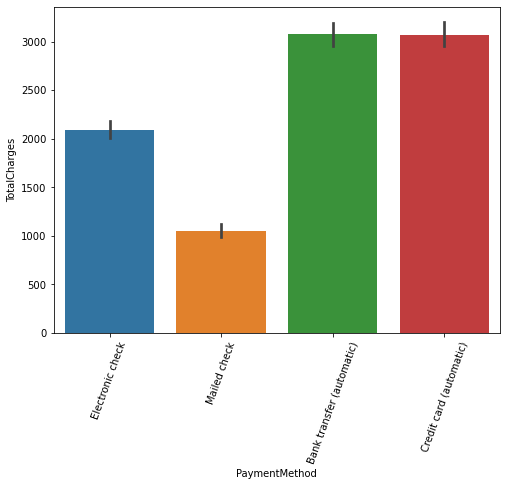

In [11]:
## Qual a média de total charges (compra de créditos) por tipo de pagamento (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) ?
plt.figure(figsize = (8,6))
sns.barplot(data = df, x = 'PaymentMethod', y = 'TotalCharges')
plt.xticks(rotation = 70);

Media de charges ai faz mais sentido realmente para as transferencias bancárias e o cartão de crédito automático. É a método mais comum hoje em dia


Embora ainda temos uma grande presença de mailed check (é quando é enviado o pagamento via "correios")

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

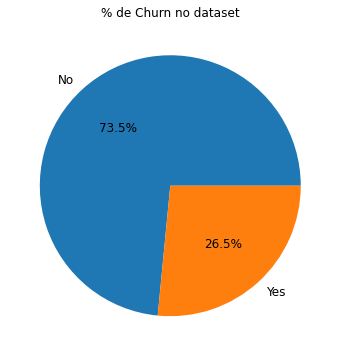

In [12]:
## Qual a proporção de churns ?
display(df['Churn'].value_counts(normalize = True))

# Plotando

# trazendo somente 1 coluna
plt.figure(figsize = (8,6))
df.groupby('Churn').size().plot.pie(autopct="%.1f%%", fontsize = 12);
plt.ylabel('')
plt.title('% de Churn no dataset', fontsize = 12);

Nesse dataset observamos que existe claramente uma discrepância muito grande de dados, o percentual de churn está bem **desbalanceado**

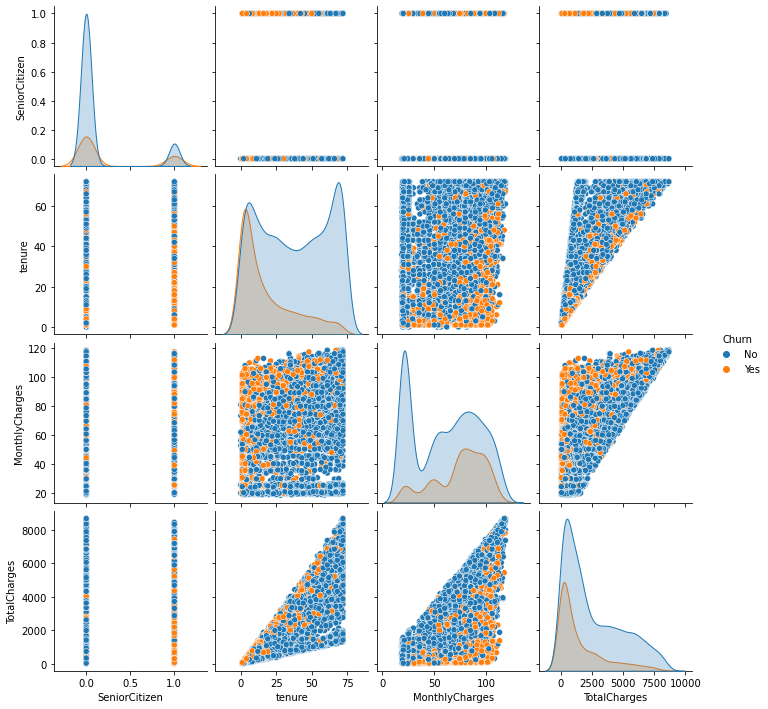

In [13]:
sns.pairplot(df, hue = 'Churn')

<Figure size 720x432 with 0 Axes>

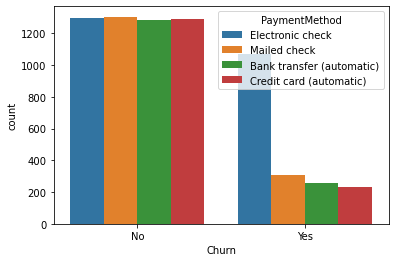

<Figure size 720x432 with 0 Axes>

In [14]:
## Os os tipos de pagamentos com mais churn?

sns.countplot(x =df['Churn'], hue = df['PaymentMethod'])

plt.figure(figsize = (10,6))

Observamos que o meio de pagamento através de cheque eletrônico poussuem os maiores valores de churn!

In [15]:
df.groupby('PaymentMethod')['TotalCharges'].mean().sort_values(ascending = False)

PaymentMethod
Bank transfer (automatic)    3079.299546
Credit card (automatic)      3071.396022
Electronic check             2090.868182
Mailed check                 1054.483915
Name: TotalCharges, dtype: float64

Na média os cheques eletrônicos possuem uma média inferior a transferência bancária e cartao de crédito automático...

In [16]:
# Transformando nosso dataset para numeric

df_dummies = pd.get_dummies(df, drop_first = True).dropna()
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [17]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [18]:
df_dummies['Churn_Yes'].value_counts(normalize = True)

0    0.734215
1    0.265785
Name: Churn_Yes, dtype: float64

Como vimos temos mts dados ainda **desbalanceados**

In [19]:
## vamos fazer um resampling do nosso dataset
def undersample(df,column_name = 'y'):

    # capta o número de instâncias que cada classe vai passar a ter
    # no undersampling, pe
    n = df[column_name].value_counts().min()
      
    # cria um novo dataframe com as colunas do df original
    new_df = pd.DataFrame()
    
    for cat in df[column_name].unique():
        
        filtered_df = df[df[column_name] == cat]
            
        new_df = pd.concat([new_df, filtered_df.sample(n)])
        
    return new_df

# realize o undersampling est
df_resamp = undersample(df_dummies,'Churn_Yes')

In [20]:
df_resamp['Churn_Yes'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Churn_Yes, dtype: float64

Agora com os dados balanceados e com os dados categoricos ok! Vamos iniciar os modelos

In [21]:
## dividindo os dados entre treino e test
X = df_resamp.drop(columns = 'Churn_Yes', axis = 1)
y = df_resamp['Churn_Yes']

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Regressão Logística

In [22]:
## importando biblioteca
from sklearn.linear_model import LogisticRegression

## intanciando a classe do estimador
estimador = LogisticRegression(max_iter = 150)

#treinando o modelo utilizando os dados de treino
modelo = estimador.fit(X_train,y_train)

In [23]:
## checando o intercept
modelo.intercept_

array([-0.00916553])

In [24]:
## checando coef
modelo.coef_

array([[ 3.43388158e-01, -5.44918322e-02,  1.59575732e-02,
         2.08395981e-04, -2.88069244e-02, -4.67116566e-02,
        -2.64142642e-01, -2.10006243e-01,  2.01273989e-01,
         1.60753867e-01,  3.48828134e-01, -5.04843637e-02,
        -5.04843637e-02, -4.73263325e-01, -5.04843637e-02,
        -1.52646410e-01, -5.04843637e-02, -1.36524143e-01,
        -5.04843637e-02, -5.69855063e-01, -5.04843637e-02,
         2.91842261e-02, -5.04843637e-02,  1.32906396e-02,
        -2.75963807e-01, -4.41103098e-01,  3.80412726e-01,
        -1.48513132e-01,  5.03907355e-01, -1.91526957e-01]])

In [25]:
## vamos fazer predições!
y_pred = modelo.predict(X_test)

In [26]:
## Vamos utilizar as métricas de avaliação de um modelo de classificação

from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[282  97]
 [ 76 293]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       379
           1       0.75      0.79      0.77       369

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



Temos um modelo com o Weighted avg do F1-Score de **77%**, razoável!

## KNN 

In [27]:
## Para o KNN visto que utiliza métodos de distância, vamos usar o StandardScaler nos dados

from sklearn.preprocessing import StandardScaler

## instanciando a classe
scaler = StandardScaler()

In [28]:
# ajustando as escalas de X_train
X_train = scaler.fit_transform(X_train)

In [29]:
# importando biblioteca 
from sklearn.neighbors import KNeighborsClassifier

# instanciando a classe classificadora
estimador = KNeighborsClassifier()
# fitando o modelo
modelo = estimador.fit(X_train,y_train)

In [30]:
# gerando predições
X_test = scaler.fit_transform(X_test)

y_pred = modelo.predict(X_test)

In [31]:
# avalie o modelo
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[257 122]
 [ 75 294]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       379
           1       0.71      0.80      0.75       369

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



O F1 score do KNN foi de **71%**, um pouco inferior a regressão logística!

## RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier
# intanciando a classe
estimador = RandomForestClassifier()

# gerando novamente um split por conta que no KNN salvamos em cima do antigo X_train e tests...
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

modelo = estimador.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.74      0.75       379
           1       0.74      0.77      0.75       369

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



## AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier
estimador = AdaBoostClassifier()
    
modelo = estimador.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# dica: cheque antes as variáveis X e y! pode ser uma boa ideia redefini-las,
# para evitar que alterações indesejáveis feitas acima sejam propagadas!

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       379
           1       0.73      0.81      0.77       369

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



### Pipeline + Gridsearch

Abaixo, vamos **ler novamente os dados, fazendo as trasnformações acima**, para depois construir um Pipeline que vai ser composto por:

- Transformação das features categóricas usando o OneHotEncoder;
- Modelagem dos dados utilizando algum estimador.

Logo após, estruturamos o Grid Search dos hiperparâmetros do estimador escolhido!



Obs.: para a definição dos parâmetros da grade, é uma boa ideia dar uma lida [neste link](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)

Em particular: "The number of weak learners is controlled by the parameter n_estimators. The learning_rate parameter controls the contribution of the weak learners in the final combination. By default, weak learners are decision stumps. Different weak learners can be specified through the base_estimator parameter. The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples to consider a split min_samples_split)".

Então, note que a grade que definida é:

- Para o adaboost em si:
    
    - algoritmo utilizado: 'SAMME' ou 'SAMME.R';
    - número máximo de estimadores fracos a serem utilizados: de 50 a 55;


- Para o "base estimator" (que por padrão é o stump - árvore com uma unica quebra):

    - qual o critério da quebra: "gini" ou "entropy";
    - qual a metodologia da quebra: "best" ou "random"

Obs.: para a definição dos parâmetros da grade, é uma boa ideia dar uma lida [neste link](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)

Em particular: "The number of weak learners is controlled by the parameter n_estimators. The learning_rate parameter controls the contribution of the weak learners in the final combination. By default, weak learners are decision stumps. Different weak learners can be specified through the base_estimator parameter. The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples to consider a split min_samples_split)".

Então, note que a grade que definida é:

- Para o adaboost em si:
    
    - algoritmo utilizado: 'SAMME' ou 'SAMME.R';
    - número máximo de estimadores fracos a serem utilizados: de 50 a 55;


- Para o "base estimator" (que por padrão é o stump - árvore com uma unica quebra):

    - qual o critério da quebra: "gini" ou "entropy";
    - qual a metodologia da quebra: "best" ou "random"

In [34]:
# carregando dados novamente
df = pd.read_csv(r'churn telcon.csv')

#####################################################################################
# primeira etapa de pré-processamento, conforme feito acima

# eliminando a coluna de id
df = df.drop(columns="customerID")

# transformando os dados na coluna "TotalCharges" em dados numéricos
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: float(x) if x != " " else np.nan)

# eliminando os dados nulos
df = df.dropna()

# resampling
df_resamp = undersample(df,'Churn')

#####################################################################################
# separando os dados

# dividindo em features e y (target)
X = df_resamp.drop(columns = 'Churn')
y = df_resamp['Churn']

from sklearn.model_selection import train_test_split

# dividindo a base de dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


#####################################################################################
# construção do pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# lista com o nome das colunas de features categoricas
categorical_features = X.select_dtypes(exclude = [np.number]).columns.tolist()

# pipeline de transformação de dados com o OneHotEncoder
categorical_transformer = Pipeline([('onehot', OneHotEncoder(drop="first"))])

# transformador das features categóricas com o pipeline acima
# note que as features numéricas NÃO SÃO ALTERADAS: argumento emainder='passthrough'
preprocessor = ColumnTransformer(transformers = [('cat', categorical_transformer, categorical_features)], 
                                 remainder='passthrough')

# pipeline final de preprocessamento + estimador (no caso, o adaboost)
# note que o base_estimator é explicitameente definido,
# para que seus parâmetros possam ser buscados no gridsearch!
estimador_fraco = DecisionTreeClassifier(max_depth=1)

pipe = Pipeline([('preprocessor', preprocessor),
                 ('ada', AdaBoostClassifier(base_estimator = estimador_fraco))])


#####################################################################################
# construção do gridsearch

from sklearn.model_selection import GridSearchCV



# definindo a grade de parâmetros
param_grid = {"ada__algorithm": ['SAMME', 'SAMME.R'],
              "ada__n_estimators": range(50, 56),
              "ada__base_estimator__criterion" : ["gini", "entropy"],
              "ada__base_estimator__splitter" :   ["best", "random"]}

grid = GridSearchCV(pipe, param_grid, scoring = "f1_weighted", cv = 5) # cv - validaçao cruzada

# fitando o gridsearch
modelo = grid.fit(X_train, y_train)


#####################################################################################
# predições e avaliação do melhor modelo

y_pred = modelo.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[263 116]
 [ 68 301]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

          No       0.79      0.69      0.74       379
         Yes       0.72      0.82      0.77       369

    accuracy                           0.75       748
   macro avg       0.76      0.75      0.75       748
weighted avg       0.76      0.75      0.75       748



In [35]:
modelo.best_params_

{'ada__algorithm': 'SAMME.R',
 'ada__base_estimator__criterion': 'gini',
 'ada__base_estimator__splitter': 'random',
 'ada__n_estimators': 54}

Ou seja, um adaboost trainado com o algortimo SAMME, com no máximo 54 stumps com critério de gini e splitter aleatório!

**Obs.:** para a busca de melhores parâmetros numéricos (como o "n_estimators"), é muito melhor utilizarmos o **random search**, pois o gridsearch limita muito o espaço de busca (dado que não dá pra gente ficar esperando uma eternidade pro gridsearch procurar TODAS as combinações)

Assim, vamos, abaixo, fazer uma **busca aleatória** em um espaço maior, entre 20 e 200! Mas, vamos definir que apenas 50 modelos diferentes sejam treinados!

In [36]:
# carregando dados novamente
df = pd.read_csv(r'churn telcon.csv')

#####################################################################################
# primeira etapa de pré-processamento, conforme feito acima

# eliminando a coluna de id
df = df.drop(columns="customerID")

# transformando os dados na coluna "TotalCharges" em dados numéricos
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: float(x) if x != " " else np.nan)

# eliminando os dados nulos
df = df.dropna()

# resampling
df_resamp = undersample(df,'Churn')

#####################################################################################
# separando os dados

# dividindo em features e y (target)
X = df_resamp.drop(columns = 'Churn')
y = df_resamp['Churn']

from sklearn.model_selection import train_test_split

# dividindo a base de dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


#####################################################################################
# construção do pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# lista com o nome das colunas de features categoricas
categorical_features = X.select_dtypes(exclude = [np.number]).columns.tolist()

# pipeline de transformação de dados com o OneHotEncoder
categorical_transformer = Pipeline([('onehot', OneHotEncoder(drop="first"))])

# transformador das features categóricas com o pipeline acima
# note que as features numéricas NÃO SÃO ALTERADAS: argumento remainder='passthrough'
preprocessor = ColumnTransformer(transformers = [('cat', categorical_transformer, categorical_features)], 
                                 remainder='passthrough')

# pipeline final de preprocessamento + estimador (no caso, o adaboost)
# note que o base_estimator é explicitameente definido,
# para que seus parâmetros possam ser buscados no gridsearch!
estimador_fraco = DecisionTreeClassifier(max_depth=1)

pipe = Pipeline([('preprocessor', preprocessor),
                 ('ada', AdaBoostClassifier(base_estimator = estimador_fraco))])


#####################################################################################
# construção do randomsearch


from sklearn.model_selection import RandomizedSearchCV
import scipy

# definindo a grade (distribuição) de parâmetros
param_distributions = {"ada__algorithm": ['SAMME', 'SAMME.R'],
                      "ada__n_estimators": scipy.stats.randint(20, 200),
                      "ada__base_estimator__criterion" : ["gini", "entropy"],
                      "ada__base_estimator__splitter" :   ["best", "random"]}

grid = RandomizedSearchCV(pipe, param_distributions, scoring = "f1_weighted", cv = 5, n_iter=50)

# fitando o gridsearch
modelo = grid.fit(X_train, y_train)


#####################################################################################
# predições e avaliação do melhor modelo

y_pred = modelo.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[278 101]
 [ 78 291]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

          No       0.78      0.73      0.76       379
         Yes       0.74      0.79      0.76       369

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



Obtivemos resultados ainda melhores!!

O melhor modelo teve os seguinte parâmetros:

In [37]:
modelo.best_params_

{'ada__algorithm': 'SAMME',
 'ada__base_estimator__criterion': 'gini',
 'ada__base_estimator__splitter': 'random',
 'ada__n_estimators': 138}